# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time


# Import API key
from Config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs, cities and country
lat_lngs = []
cities = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        country.append(citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code)
# Print the city count to confirm sufficient count
len(cities)

603

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
df_countries = pd.DataFrame({'Cities': cities, 'Country': country})

#Additional Columns

df_countries['Latitude'] = ''
df_countries['Longitude'] = ''
df_countries['Temperature (F)'] = ''
df_countries['Humidity (%)'] = ''
df_countries['Cloudiness (%)'] = ''
df_countries['Wind Speed (mph)'] = ''
#drop duplicated cities
df_countries = df_countries.drop_duplicates(subset=['Cities'],keep='first')

# Perform a weather check on each city using a series of successive API calls.
for index, row in df_countries.iterrows():
    city_pd = row['Cities']
    state_pd = row['Country']
    base_url = "http://api.openweathermap.org/data/2.5/forecast?q={},{}&units=IMPERIAL&mode=json&APPID={}".format(city_pd,state_pd,api_key)

    country_info = requests.get(base_url).json()

    print("Processing Record " + str(index) +" of Set " + " - " + str(row['Cities']) )

# Manage exceptions
    try:
        df_countries.set_value(index,'Latitude',country_info['city']['coord']['lat'])
        df_countries.set_value(index,'Longitude',country_info['city']['coord']['lon'])
        df_countries.set_value(index,'Temperature (F)',country_info['list'][0]['main']['temp'])
        df_countries.set_value(index,'Humidity (%)',country_info['list'][0]['main']['humidity'])
        df_countries.set_value(index,'Cloudiness (%)',country_info['list'][0]['clouds']['all'])
        df_countries.set_value(index,'Wind Speed (mph)',country_info['list'][0]['wind']['speed'])
        
    except KeyError:
        df_countries.set_value(index,'Latitude',np.nan)
        df_countries.set_value(index,'Longitude',np.nan)
        df_countries.set_value(index,'Temperature (F)',np.nan)
        df_countries.set_value(index,'Humidity (%)',np.nan)
        df_countries.set_value(index,'Cloudiness (%)',np.nan)
        df_countries.set_value(index,'Wind Speed (mph)',np.nan)
        print("City not found. Skipping")

print("------------------------")
print("Data Retrieval Complete ")
print("------------------------")

Processing Record 0 of Set  - rikitea


C:\Users\pipe_\Anaconda3\lib\site-packages\ipykernel_launcher.py:26: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pipe_\Anaconda3\lib\site-packages\ipykernel_launcher.py:27: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pipe_\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pipe_\Anaconda3\lib\site-packages\ipykernel_launcher.py:29: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pipe_\Anaconda3\lib\site-packages\ipykernel_launcher.py:30: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pipe_\Anaconda3\lib\s

Processing Record 1 of Set  - tomar
Processing Record 2 of Set  - leopold
Processing Record 3 of Set  - upernavik
Processing Record 4 of Set  - saskylakh
Processing Record 5 of Set  - georgetown
Processing Record 6 of Set  - turan
Processing Record 7 of Set  - ringas
Processing Record 8 of Set  - atuona
Processing Record 9 of Set  - ushuaia
Processing Record 10 of Set  - yellowknife
Processing Record 11 of Set  - belushya guba
City not found. Skipping


C:\Users\pipe_\Anaconda3\lib\site-packages\ipykernel_launcher.py:34: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pipe_\Anaconda3\lib\site-packages\ipykernel_launcher.py:35: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pipe_\Anaconda3\lib\site-packages\ipykernel_launcher.py:36: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pipe_\Anaconda3\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pipe_\Anaconda3\lib\site-packages\ipykernel_launcher.py:38: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
C:\Users\pipe_\Anaconda3\lib\s

Processing Record 12 of Set  - sangar
Processing Record 13 of Set  - puerto ayora
Processing Record 14 of Set  - taolanaro
City not found. Skipping
Processing Record 15 of Set  - dikson
Processing Record 16 of Set  - buta
Processing Record 17 of Set  - lolua
City not found. Skipping
Processing Record 18 of Set  - castro
Processing Record 19 of Set  - bluff
Processing Record 20 of Set  - albany
Processing Record 21 of Set  - port macquarie
Processing Record 22 of Set  - san luis
Processing Record 23 of Set  - saleaula
City not found. Skipping
Processing Record 24 of Set  - illoqqortoormiut
City not found. Skipping
Processing Record 25 of Set  - hithadhoo
Processing Record 26 of Set  - tommot
Processing Record 27 of Set  - alofi
Processing Record 28 of Set  - uruzgan
Processing Record 29 of Set  - new norfolk
Processing Record 30 of Set  - mataura
City not found. Skipping
Processing Record 31 of Set  - bredasdorp
Processing Record 32 of Set  - vaini
Processing Record 33 of Set  - salinas

Processing Record 196 of Set  - kabo
Processing Record 197 of Set  - roma
Processing Record 198 of Set  - la palma
Processing Record 199 of Set  - ilulissat
Processing Record 200 of Set  - salalah
Processing Record 201 of Set  - hirado
Processing Record 202 of Set  - medzilaborce
Processing Record 203 of Set  - ponta delgada
Processing Record 204 of Set  - kieta
Processing Record 205 of Set  - caucaia
Processing Record 206 of Set  - mount isa
Processing Record 207 of Set  - lagoa
Processing Record 208 of Set  - tiksi
Processing Record 209 of Set  - eyl
Processing Record 210 of Set  - ofaqim
Processing Record 211 of Set  - greensboro
Processing Record 212 of Set  - tucuma
City not found. Skipping
Processing Record 213 of Set  - manjacaze
Processing Record 214 of Set  - ogaminana
Processing Record 215 of Set  - santa maria
Processing Record 216 of Set  - high rock
Processing Record 217 of Set  - watrous
Processing Record 218 of Set  - chapais
Processing Record 219 of Set  - uyskoye
Proce

Processing Record 387 of Set  - yershov
Processing Record 388 of Set  - tsihombe
City not found. Skipping
Processing Record 389 of Set  - caceres
City not found. Skipping
Processing Record 390 of Set  - pokaran
Processing Record 391 of Set  - suez
Processing Record 392 of Set  - mayor pablo lagerenza
Processing Record 393 of Set  - san miguel
Processing Record 394 of Set  - chopovychi
Processing Record 395 of Set  - wanning
Processing Record 396 of Set  - bushenyi
Processing Record 397 of Set  - camana
City not found. Skipping
Processing Record 398 of Set  - obo
Processing Record 399 of Set  - puerto del rosario
Processing Record 400 of Set  - winsum
Processing Record 401 of Set  - moron
Processing Record 402 of Set  - arkhipo-osipovka
Processing Record 403 of Set  - pidhorodne
Processing Record 404 of Set  - lokot
Processing Record 405 of Set  - buchanan
Processing Record 406 of Set  - yamaranguila
Processing Record 407 of Set  - anori
Processing Record 408 of Set  - kande
Processing 

Processing Record 571 of Set  - dakar
Processing Record 572 of Set  - san carlos de bariloche
Processing Record 573 of Set  - puerto escondido
Processing Record 574 of Set  - nouadhibou
Processing Record 575 of Set  - mitchell
Processing Record 576 of Set  - noyabrsk
Processing Record 577 of Set  - galveston
Processing Record 578 of Set  - andra
Processing Record 579 of Set  - half moon bay
Processing Record 580 of Set  - tura
Processing Record 581 of Set  - banda aceh
Processing Record 582 of Set  - saryshagan
City not found. Skipping
Processing Record 583 of Set  - kandrian
Processing Record 584 of Set  - diego de almagro
Processing Record 585 of Set  - dalbandin
Processing Record 586 of Set  - wexford
City not found. Skipping
Processing Record 587 of Set  - igarka
Processing Record 588 of Set  - changji
Processing Record 589 of Set  - jutai
Processing Record 590 of Set  - bulgan
Processing Record 591 of Set  - nguiu
City not found. Skipping
Processing Record 592 of Set  - shingu
Pro

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Export the city data into a .csv.
df_countries=df_countries.dropna()

df_countries.to_csv(path_or_buf='df_countries.csv')
print(df_countries.count())

Cities              532
Country             532
Latitude            532
Longitude           532
Temperature (F)     532
Humidity (%)        532
Cloudiness (%)      532
Wind Speed (mph)    532
dtype: int64


In [5]:
#Display the DataFrame
df_countries.head()

,Cities,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,rikitea,pf,-23.1203,-134.969,67.71,58,71,11.97
1,tomar,pt,39.6037,-8.4151,62.02,86,0,12.5
2,leopold,au,-38.1834,144.467,60.08,61,16,13.98
3,upernavik,gl,72.7868,-56.1549,44.46,96,100,15.95
4,saskylakh,ru,71.965,114.094,74.55,32,99,12.91


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

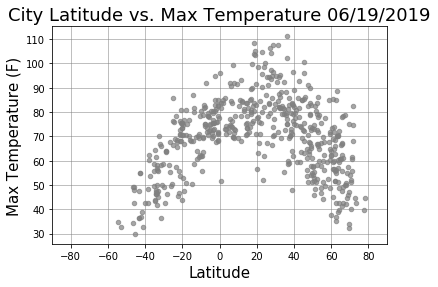

In [6]:
#Plot City Latitude vs. Max Temperature 06/19/2019
plt.scatter(df_countries['Latitude'],df_countries['Temperature (F)'], color="gray", s=20, alpha=.7,
            cmap='viridis',marker='o')
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.title('City Latitude vs. Max Temperature 06/19/2019',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Max Temperature (F)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));
plt.grid(zorder=0,color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("City Latitude vs. Max Temperature 06-19-2019.png")

#### Latitude vs. Humidity Plot

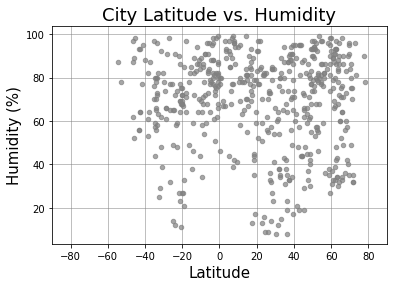

In [7]:
#Plot City Latitude vs. Humidity
plt.scatter(df_countries['Latitude'],df_countries['Humidity (%)'], color="gray", s=20, alpha=.7,
            cmap='viridis',marker='o');
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.title('City Latitude vs. Humidity',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Humidity (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));
plt.grid(zorder=0,color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("City Latitude vs. Humidity 06-19-2019.png")

#### Latitude vs. Cloudiness Plot

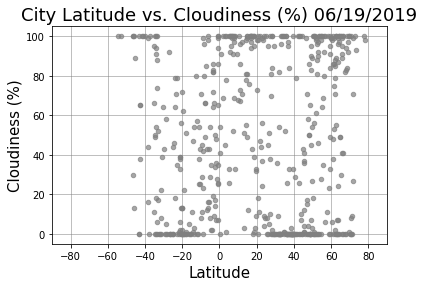

In [8]:
#Plot City Latitude vs. Cloudiness (%) 06/19/2019
plt.scatter(df_countries['Latitude'],df_countries['Cloudiness (%)'],color="gray", s=20, alpha=.7,
            cmap='viridis',marker='o');
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.title('City Latitude vs. Cloudiness (%) 06/19/2019',fontsize=(18));
plt.xlim(-90,90)
plt.ylabel('Cloudiness (%)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));
plt.grid(zorder=0,color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("City Latitude vs. Cloudiness (%) 06-19-2019.png")

#### Latitude vs. Wind Speed Plot

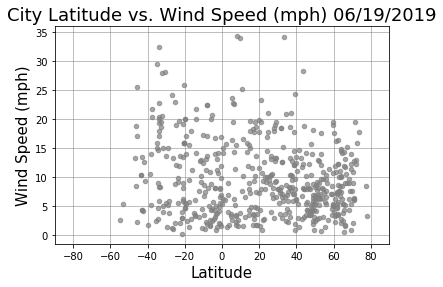

In [9]:
#Plot City Latitude vs. Wind Speed (mph) 06/19/2019
plt.scatter(df_countries['Latitude'],df_countries['Wind Speed (mph)'],color="gray", s=20, alpha=.7,
            cmap='viridis',marker='o');
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
plt.xlim(-90,90)
plt.title('City Latitude vs. Wind Speed (mph) 06/19/2019',fontsize=(18));
plt.ylabel('Wind Speed (mph)',fontsize=(15));
plt.xlabel('Latitude',fontsize=(15));
plt.grid(zorder=0,color='grey', linestyle='-', linewidth=1, alpha=0.5)
plt.savefig("City Latitude vs. Wind Speed (mph) 06-19-2019.png")